## Computable Dart Board with Integration to Pixelboard
### Solution using pause()

<img src="https://thebushschool.github.io/fcsr/geometry/pi1.png" align="left" width=400 />
Here we have a circular dart board with radius R inscribed in a square. If you threw <span style="color:red"</span>A LOT OF DARTS</span> then Area = number of darts!

$$Circle\_Area={\pi}\times{R}^2$$

$$Square\_Area=(2\times{R})^2$$

$$\frac{Square\_Area}{Circle\_Area}=\frac{4\times{R}^2}{\pi\times{R}^2}=\frac{4}{\pi}$$

$$\frac{Darts\_in\_Square}{Darts\_in\_Circle}=\frac{4}{\pi}$$
$${\pi}={4}\times(\frac{Darts\_in\_Circle}{Darts\_in\_Square})$$

<span style="color:blue">Now let's integrate the pixelboard!</span>


## Let the computer play Darts to calculate PI throw hundreds of Darts !!
#### We will walk through and MODIFY each code cell below!

### PEGBOARD Markdown Block

![pc](pixel_coordinates.png)

### ADD A PICTURE OF YOUR PIXEL BOARD BELOW!!

In [1]:
![myBoard]()

/bin/sh: 1: Syntax error: Bad function name


### Coordinate Transformation Block 

In [2]:
# Specifying the origin and size of the pixel peg board

num_pixels = 100   # 10x10 Matrix
side = 10

# Default Origin is top-left of pixel peg board
rpx = 0  # top-left with +col going right
cpx = 0  # top-left with +row going down

def origin(loc):
    global rpx
    global cpx
    if  loc == 'tl':     # top-left
        rpx = 0              # top-left with +row going down
        cpx = 0              # top-left with +col going right
    elif  loc == 'bl':   # bot-left
        rpx = side-1       # bot-left with +row going up
        cpx = 0            # bot-left with +col going right
    elif  loc == 'tr':   # top-right
        rpx = 0            # top-right with +row going down
        cpx = side-1       # top-right with +col going left
    elif  loc == 'br':   # bot-right
        rpx = side-1       # bot-right with +row going up
        cpx = side-1       # bot-right with +col going left        
    else:                # default top-left
        rpx = 0            # top-left with +row going down
        cpx = 0            # top-left with +col going right   

In [3]:
# Creating pixel conversion 2-D Array 10x10
import math
import numpy as np

P = np.array([[90,91,92,93,94,95,96,97,98,99], 
              [89,88,87,86,85,84,83,82,81,80],
              [70,71,72,73,74,75,76,77,78,79], 
              [69,68,67,66,65,64,63,62,61,60],
              [50,51,52,53,54,55,56,57,58,59], 
              [49,48,47,46,45,44,43,42,41,40],
              [30,31,32,33,34,35,36,37,38,39], 
              [29,28,27,26,25,24,23,22,21,20],
              [10,11,12,13,14,15,16,17,18,19], 
              [ 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])  

def pix10(r,c):  
    return P[abs(rpx-r)][abs(cpx-c)]

def pix(x,y):  
    p = math.trunc(5*(x+0.99))
    q = math.trunc(5*(y-0.99))    
    r = abs(q)
    c = abs(p)
    #print(f'r = {r} c = {c}')
    return P[r][c]

### Import Libraries Block

In [4]:
#### IMPORT LIBRARIES Code Block
import board
import neopixel
from time import sleep
from datetime import datetime
from sys import exit
from gpiozero import LED, Button
import signal
from signal import pause

### Neopixel Setup Block

In [5]:
#### Neopixel Setup Block
pixel_pin = board.D18
ORDER = neopixel.RGB
pixels = neopixel.NeoPixel(pixel_pin, num_pixels, 
                           brightness=0.1, auto_write=False,
                           pixel_order=ORDER)

### Python Functions Block 

In [6]:
def reset():       # simply set leds off
    for ii in range(num_pixels):
        #pixels.fill((0,0,0))
        pixels[ii]=((0,0,0))
    pixels.show()
    sleep(0.1)

In [7]:
def initialize():   # set leds white-off
    for ii in range(3):         # flash white 3-times
        pixels.fill((0,0,0))
        #print(pixels)
        pixels.show()
        sleep(0.1)
        pixels.fill((255,255,255))
        #print(pixels)
        pixels.show()
        sleep(0.1)
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()    

In [8]:
def allcolors():    # set leds red-green-blue-yellow-magenta-cyan
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((255,0,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,255,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,0,255))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((255,255,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((255,0,255))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,255,255))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()
    sleep(1)

In [9]:
def finish():
    for ii in range(3):         # flash cyan 3-times
        pixels.fill((0,0,0))
        #print(pixels)
        pixels.show()
        sleep(0.1)
        pixels.fill((0,255,255))
        #print(pixels)
        pixels.show()
        sleep(0.1)    
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()        

In [10]:
def travel():
    for ii in range(3):             # start 3-white flashes in first pixel then turn it green
        pixels[0]=((0,0,0))
        pixels.show()
        sleep(0.1)
        pixels[0]=((255,255,255))
        pixels.show()
        sleep(0.1)
    pixels[0]=((0,255,0))
    pixels.show()
    sleep(0.1)

    for ii in range(num_pixels):    # running cyan through entire strip
        if ii > 1:                  # turn off previous - turn on current to red
            pixels[ii-1]=((0,0,0))
            pixels[ii]=((255,0,0))
        if ii > int(num_pixels/2):  # Turn middle pixel only green 
            pixels[int(num_pixels/2)]=((0,255,0)) 
        pixels.show()
        sleep(0.1)    

    for ii in range(3):             # end 3-magenta flashes in last pixel then green
        pixels[num_pixels-1]=((0,0,0))
        pixels.show()
        sleep(0.1)        
        pixels[num_pixels-1]=((255,0,255))
        pixels.show()
        sleep(0.1)
        
    pixels[num_pixels-1]=((0,255,0))
    pixels.show()
    sleep(1)    
    pixels.fill((0,0,0))
    pixels.show()
    sleep(0.1)     

In [11]:
def fill_matrix(c):
    for row in range(0,side):
        for col in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
        pixels.show()
        sleep(0.2)

In [12]:
def move_col(c):
    for col in range(0,side):
        for row in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if col > 0:
                pixn = pix10(row,col-1)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)    
    reset()
    for col in range(side-1,-1,-1):
        for row in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if col < side-1:
                pixn = pix10(row,col+1)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)
    reset()

In [13]:
def move_row(c):
    for row in range(0,side):
        for col in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if row > 0:
                pixn = pix10(row-1,col)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)    
    reset()
    for row in range(side-1,-1,-1):
        for col in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if row < side-1:
                pixn = pix10(row+1,col)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)
    reset()

In [14]:
#function to setup the plot and dartboard
import numpy as np
import matplotlib.pyplot as plt

def plot_dartboard():
    fig, axs = plt.subplots(1)
    plt.margins(0.005, tight=True)
    axs.set_aspect('equal')
    theta = np.linspace(0, 2*np.pi, num_pixels)
    radius = 1
    a = radius * np.cos(theta)
    b = radius * np.sin(theta)    
    axs.plot(a,b)

### Button Setup Block  NEEDS MODIFICATION !!
#### COPY the BUTTON SETUP Code Block from toggle_led.ipynb notebook down below
#### MODIFY ```button_state``` to be ```False``` to begin with
#### SELECT GPIO pin for Button and WIRE BREADBOARD ACCORDINGLY !!
#### OPTIONAL ADD A SECOND BUTTON TO EXIT LOOP

In [15]:
#### BUTTON SETUP Code Block

# Button setup
# 

button_state = False

# This is the Callback funtion when button is pressed
# Each time it is pressed this function is called by the system

def pressed(button):
    global button_state  # Setup to access GLOBAL button_state
    current_time = datetime.now()
    print(f'button {button.pin.number} was pressed @ {current_time}')
    # This is the statement that toggles button_state between True & False!
    button_state = not button_state  
# The Callback funtion ENDS HERE

btnpin = 4  # Connect LED long lead to GPIO?? other to GND - MODIFY THIS!
button = Button(btnpin)  # Tell the button object that the pin is GPIO???  - MODIFY THIS!

# 'pressed' is callback function above
# 'button.when_pressed' is the event it reacts to
button.when_pressed = pressed


### Main Code Block
#### THIS REQUIRES MODIFICATION BEFORE IT WILL WORK
#### READ THE COMMENTS CAREFULLY!!

In [16]:
totalThrows = 3   # how many times we throw the dart per button push. Make this a small number say 3 - MODIFY THIS

In [17]:
#Derive PI from a circle inscribed in a square
import random,math,time
import matplotlib.pyplot as plt

# setup time
start_time = time.time()

# reset neopixel array
reset()
initialize()

throwsInsideCircle = 0 # starting value for a counter
throwsOutsideCircle = 0

# Create the empty ax, ay, and cl arrays t
# This hold all the x, y, and color values of throws
# 
ax = []
ay = []
cl = []

# LOOP UNTIL BUTTON IS CLICKED!


In [18]:
def pressed_using_pause():
    global ax, ay, cl, throwsInsideCircle, throwsOutsideCircle
    plot_dartboard()
    for throw in range(10): # loop
          x = random.random()*2 -1 # a random x value between [-1.0000,0.99999] not including 1
          ax.append(x)
          y = random.random()*2 -1 # a random y value between [-1.0000,0.99999] not including 1
          ay.append(y)

          if(x*x + y*y <= 1.0): # if inside the circle (distance squared)
            throwsInsideCircle += 1
            cl.append('darkgreen')
            plt.scatter(ax, ay, color=cl)
            pixels[pix(x,y)]=((0,255,0))
          else:
            throwsOutsideCircle += 1
            cl.append('red')
            plt.scatter(ax, ay, color=cl)
            pixels[pix(x,y)]=((255,0,0))

          # all done, compute pi
          pi = (4.0*throwsInsideCircle)/(throwsInsideCircle + throwsOutsideCircle)
          #print(pi) 
          #print("--- %s seconds ---" % (time.time() - start_time))

          # show darts in neopixel array
          pixels.show()
          #print('throws so far = ' + str(throw+1) + '  calculated pi = ' + str(pi))
          sleep(.2)

    plt.title('throws = ' + str(throwsInsideCircle + throwsOutsideCircle) + '  calculated pi = ' + str(pi))    
    plt.show()
    end_time = time.time()
    elapsed_time = end_time-start_time
    print(f'   --- threw {(throwsInsideCircle + throwsOutsideCircle)} darts in {elapsed_time:.2f} seconds ---')

In [19]:
button.when_pressed = pressed_using_pause

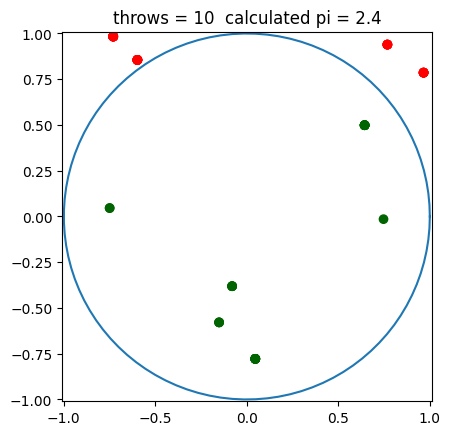

   --- threw 10 darts in 7.87 seconds ---


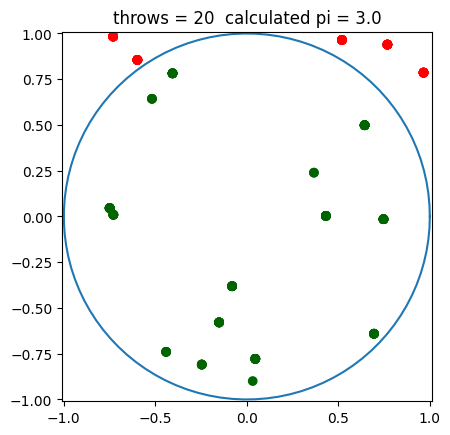

   --- threw 20 darts in 28.83 seconds ---


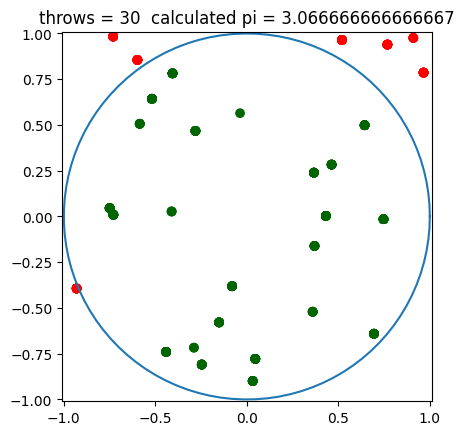

   --- threw 30 darts in 42.09 seconds ---


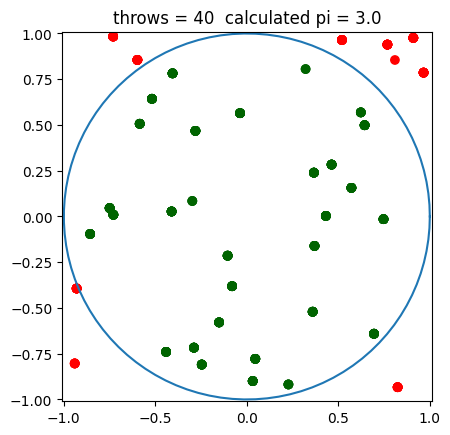

   --- threw 40 darts in 56.19 seconds ---


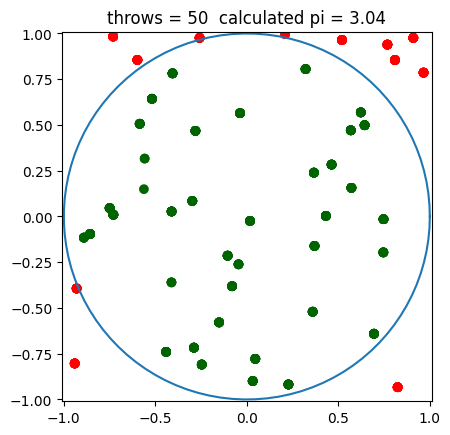

   --- threw 50 darts in 67.70 seconds ---


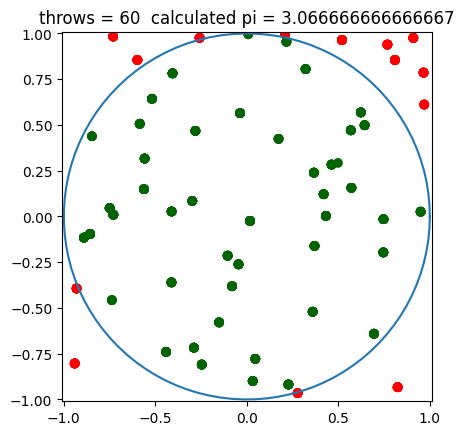

   --- threw 60 darts in 76.22 seconds ---


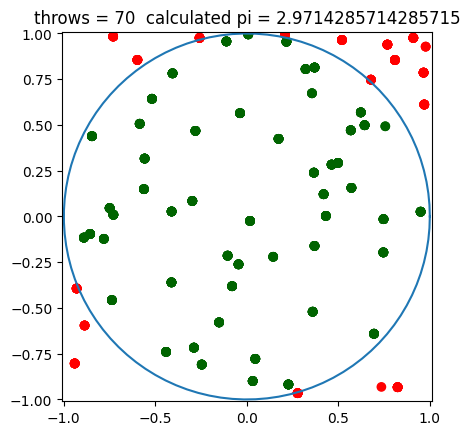

   --- threw 70 darts in 83.65 seconds ---


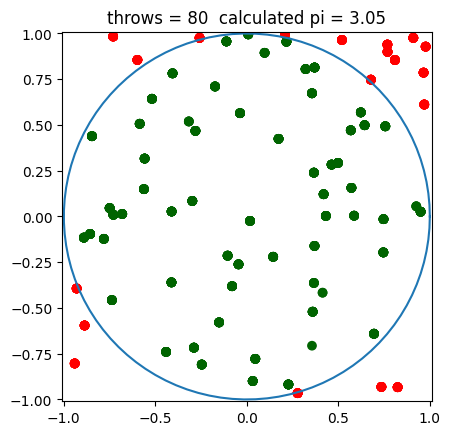

   --- threw 80 darts in 86.64 seconds ---


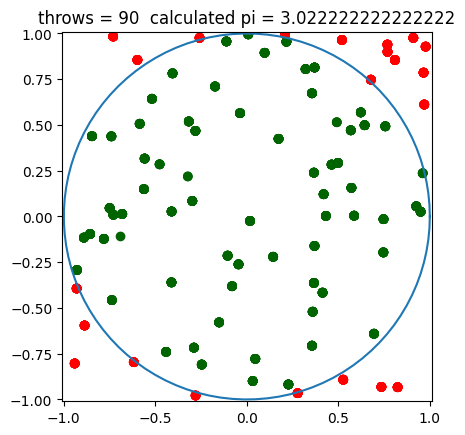

   --- threw 90 darts in 122.02 seconds ---


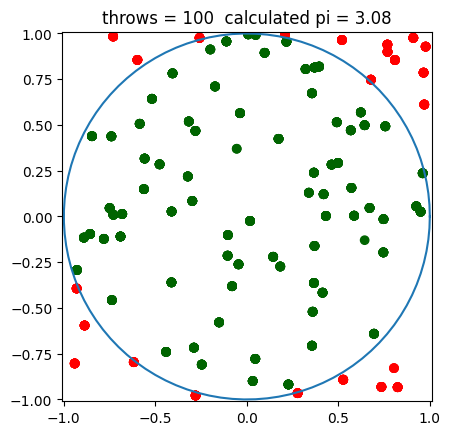

   --- threw 100 darts in 133.50 seconds ---


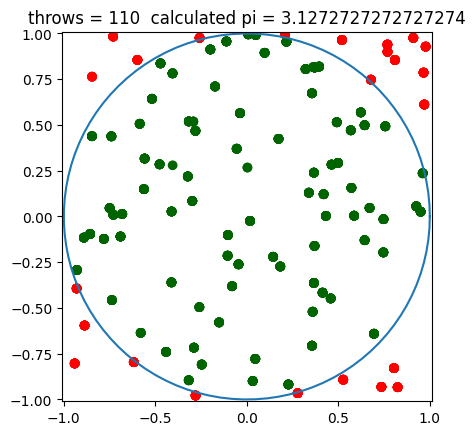

   --- threw 110 darts in 160.33 seconds ---


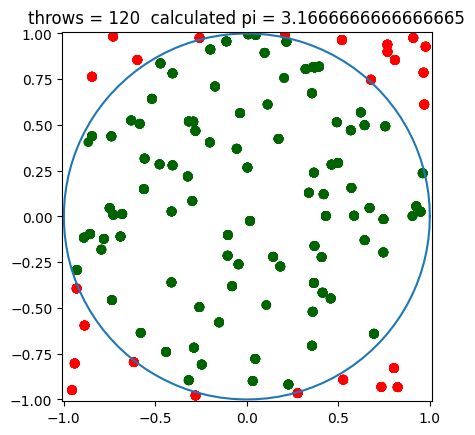

   --- threw 120 darts in 173.03 seconds ---


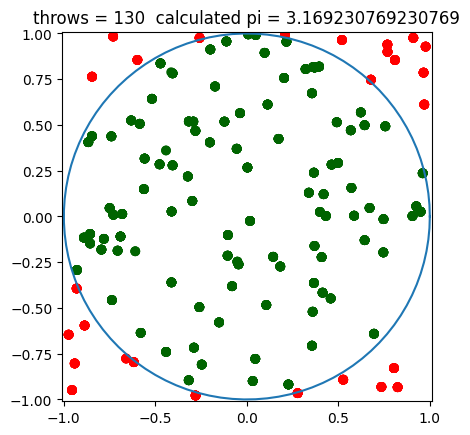

   --- threw 130 darts in 181.31 seconds ---


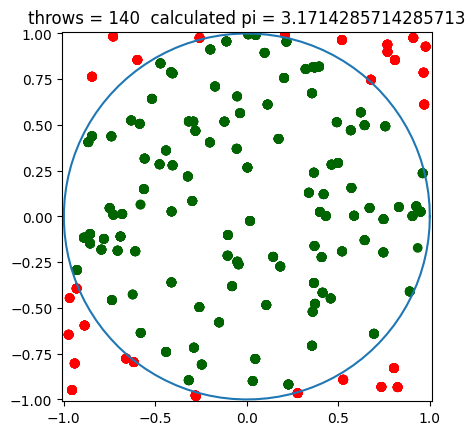

   --- threw 140 darts in 185.56 seconds ---


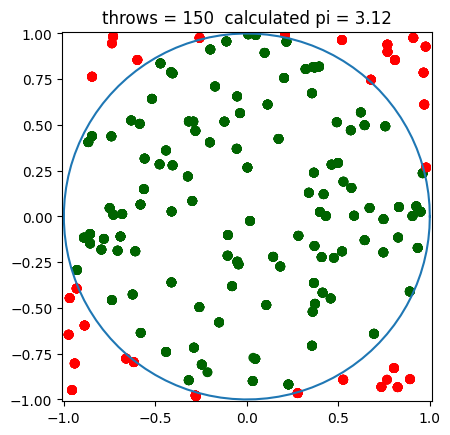

   --- threw 150 darts in 207.56 seconds ---


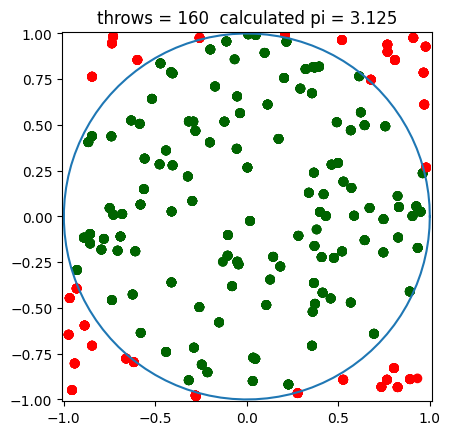

   --- threw 160 darts in 212.15 seconds ---


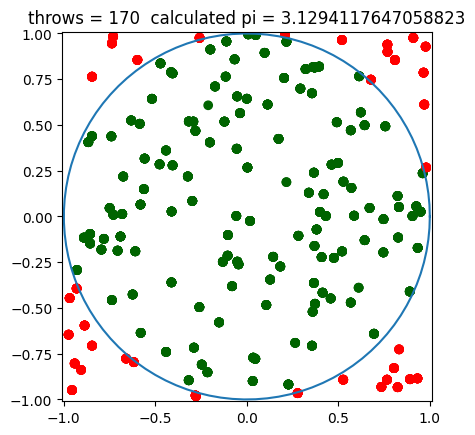

   --- threw 170 darts in 217.62 seconds ---


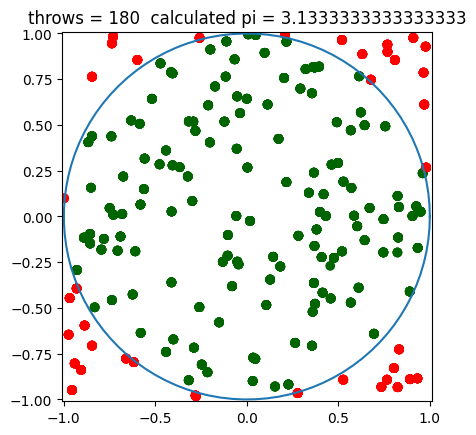

   --- threw 180 darts in 222.50 seconds ---


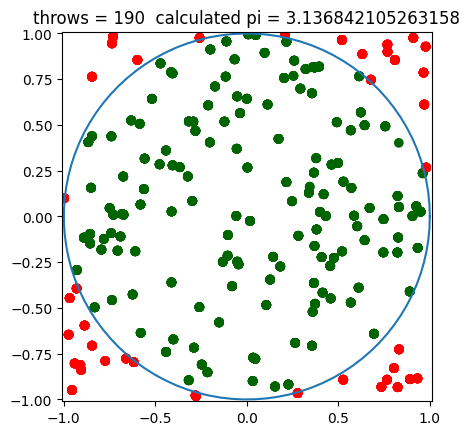

   --- threw 190 darts in 268.63 seconds ---


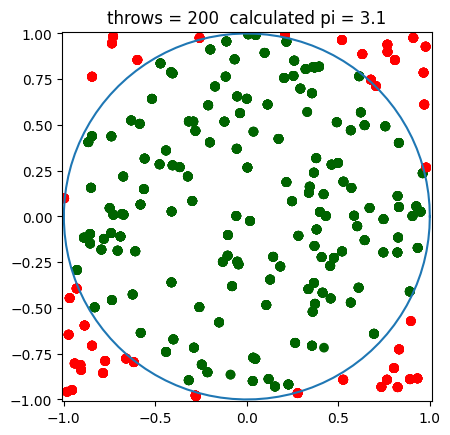

   --- threw 200 darts in 279.19 seconds ---


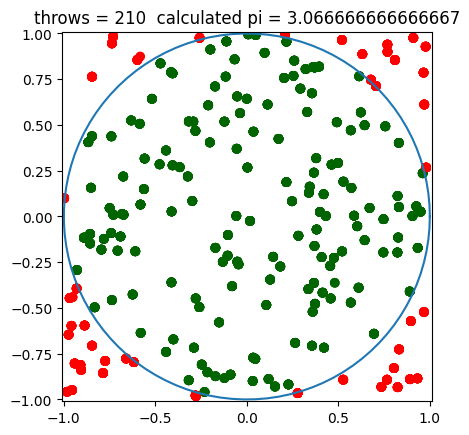

   --- threw 210 darts in 290.47 seconds ---


In [ ]:
pause()